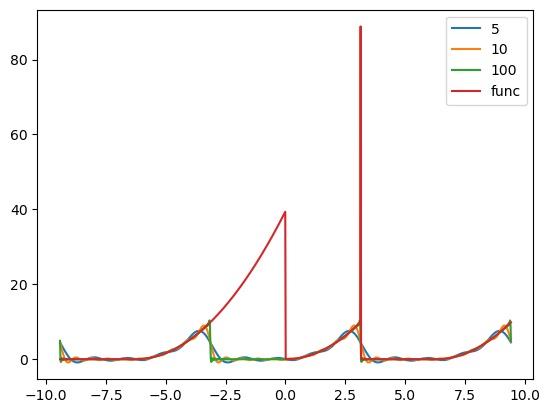

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

# Define symbols
x = sym.symbols('x')
n = sym.symbols('n', integer=True, positive=True)

# Initialize array to store Fourier series coefficients
ms = np.empty(100, dtype=object)

# Generate x values
xrange = np.linspace(3 * np.pi, -3 * np.pi, 1000)

# Initialize array to store function values for each iteration
y = np.zeros([101, 1000])

# Define the function equation
eq = x ** 2

# Calculate a0 coefficient
a0 = (1 / (2 * sym.pi)) * eq.integrate((x, 0, sym.pi))

# Store a0 in the array
ms[0] = a0

# Convert a0 to a numpy function and evaluate on xrange
f = sym.lambdify(x, ms[0], 'numpy')
y[0, :] = f(xrange)

# Calculate Fourier series coefficients
for m in range(1, 100):
    an = (1 / sym.pi) * sym.integrate((eq * sym.cos(n * x)), (x, 0, sym.pi)).subs(n, m)
    bn = (1 / sym.pi) * sym.integrate((eq * sym.sin(n * x)), (x, 0, sym.pi)).subs(n, m)
    ms[m] = ms[m - 1] + an * sym.cos(m * x) + bn * sym.sin(m * x)

    # Convert ms[m] to a numpy function and evaluate on xrange
    f = sym.lambdify(x, ms[m], 'numpy')
    y[m, :] = f(xrange)

# Piecewise plotting
for m in range(1000):
    if 0 < xrange[m] < np.pi:
        y[100, m] = xrange[m] ** 2
    elif 2 * np.pi < xrange[m] <= 3 * np.pi:
        y[100, m] = (xrange[m] - 2 * np.pi) ** 2
    elif -2 * np.pi < xrange[m] <= np.pi:
        y[100, m] = (xrange[m] + 2 * np.pi) ** 2

# Plotting
plt.plot(xrange, y[4, :])
plt.plot(xrange, y[9, :])
plt.plot(xrange, y[99, :])
plt.plot(xrange, y[100, :])

# Add legend
plt.legend(["5", "10", "100", "func"])
plt.show()
